In [120]:
print("Hello World")

Hello World


In [121]:
import numpy as np

In [122]:
import matplotlib.pyplot as plt

In [123]:
from sklearn.ensemble import IsolationForest

In [124]:
rng = np.random.RandomState(42)

In [125]:
print(rng)

RandomState(MT19937)


In [126]:
#Train Data
# This code generates two clusters of points in a two-dimensional space:

# One cluster centered around (2, 2).
# Another cluster centered around (-2, -2).

X = 0.3* rng.randn(100,2)
X_train = np.r_[X+2, X-2] # concatenates two clusters into on dataframe of 200 points

In [127]:
# Regular novel observations
X = 0.3* rng.randn(20,2)
X_test = np.r_[X+2, X-2] # concatenates two clusters into on dataframe of 40 points

In [128]:
#Abnormal novel observations

X_outliers = rng.uniform(low=-4, high=4, size=(20,2)) #generates 20 random points uniformly distributed

In [129]:
#Initialize Isolation forest

clf = IsolationForest(max_samples=100, random_state=rng) # we give max samples as 100 because we have 100 samples in X_train
clf.fit(X_train)

IsolationForest(max_samples=100,
                random_state=RandomState(MT19937) at 0x20D4B346A40)

In [130]:
#Predicts labels for the training data:

#1: Normal observation.
#-1: Anomalous observation.

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test) # Predicts labels for new regular observations (X_test), which should ideally be classified as normal (1)
y_pred_outliers = clf.predict(X_outliers) # Predicts labels for outliers (X_outliers), which should ideally be classified as anomalies (-1).

In [131]:
print(y_pred_test)

[ 1 -1 -1  1 -1 -1  1  1  1  1 -1 -1  1  1  1  1  1 -1 -1  1  1 -1 -1  1
 -1 -1 -1  1  1  1 -1 -1  1  1  1  1  1 -1 -1  1]


In [132]:
print(y_pred_outliers)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [133]:
#plot the chart

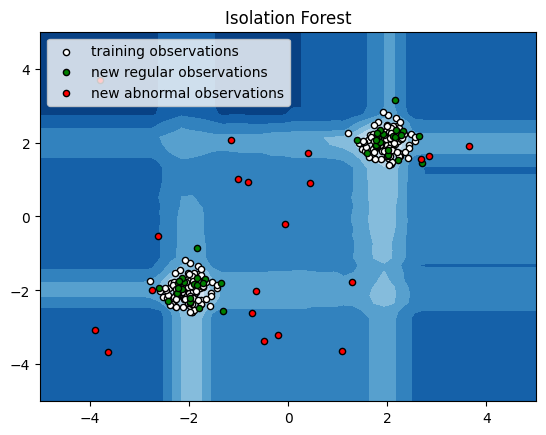

In [134]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])  # isolation forest is used here
Z = Z.reshape(xx.shape)
plt.title("Isolation Forest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(X_train[: , 0], X_train[: , 1], c='white', s=20, edgecolor='k')
b2 = plt.scatter(X_test[: , 0], X_test[: , 1], c='green', s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red', s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c], ["training observations", "new regular observations", "new abnormal observations"], loc="upper left")
plt.show()

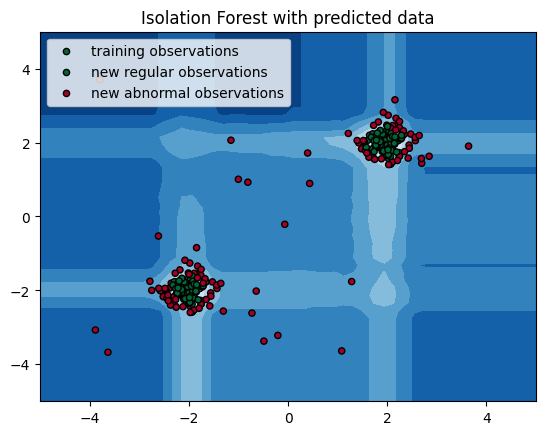

In [135]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])  # isolation forest is used here
Z = Z.reshape(xx.shape)
plt.title("Isolation Forest with predicted data")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred_train, cmap='RdYlGn', s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_test, cmap='RdYlGn', s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c=y_pred_outliers, cmap='RdYlGn', s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c], ["training observations", "new regular observations", "new abnormal observations"], loc="upper left")
plt.show()

from sklearn.metrics import f1_score, make_scorer

def anomaly_f1_score(y_true, y_pred):
    
    # Ensure y_true is converted to a NumPy array
    y_pred = np.array(y_true)
    y_true = np.array(y_true)
    # Map IsolationForest's predictions (-1 for anomalies, 1 for normal) to binary (0 for normal, 1 for anomalies)
    y_pred_binary = (y_pred == -1).astype(int)
    y_true_binary = (y_true == -1).astype(int)
    return f1_score(y_true_binary, y_pred_binary)

f1_scorer = make_scorer(anomaly_f1_score)

In [136]:
from sklearn.metrics import f1_score, make_scorer

def anomaly_f1_score(y_true, y_pred):
    y_pred_binary = (y_pred == -1).astype(int)
    y_true_binary = (np.array(y_true) == -1).astype(int)
    return f1_score(y_true_binary, y_pred_binary, zero_division=0)


f1_scorer = make_scorer(anomaly_f1_score)

In [137]:
# Ground truth labels: -1 for anomalies, 1 for normal points
y_train_labels = [1] * len(X_train)  # Assume all training data is normal
y_test_labels = [1] * len(X_test)
y_outlier_labels = [-1] * len(X_outliers)

# Combine labels along the vertical axis
combined_labels = np.concatenate([y_test_labels, y_outlier_labels])

print("Combined Labels:")
print(combined_labels)

Combined Labels:
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [138]:
# Use Grid Search to improve performance of Isolation Forest

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 20, 30, 40, 50, 100, 200],
    'max_samples': [0.25, 0.50, 0.75, 0.90, 0.95, 1.0],
    'contamination': [0.01, 0.025, 0.05, 0.1, 0.2, 'auto']  # Removed invalid value (0.0)
}

grid_search = GridSearchCV(
    IsolationForest(random_state=rng), 
    param_grid, scoring=f1_scorer, 
    cv=5, 
    refit=True,
    error_score='raise'  # Raise errors for debugging)
grid_search.fit(X_train, y_train_labels)  # Use ground truth labels here
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'contamination': 0.01, 'max_samples': 0.25, 'n_estimators': 10}


In [139]:
# Evaluate on Test Data with outliers

best_model = grid_search.best_estimator_

# Predict on test data and outliers
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)
y_pred_outliers = best_model.predict(X_outliers)

In [140]:
# Combine predictions and ground truth labels for evaluation
y_pred_combined = np.concatenate([y_pred_test, y_pred_outliers])
combined_labels = np.concatenate([y_test_labels, y_outlier_labels])

# Evaluate performance using F1-score
from sklearn.metrics import classification_report

print(classification_report(combined_labels, y_pred_combined))

              precision    recall  f1-score   support

          -1       1.00      0.15      0.26        20
           1       0.70      1.00      0.82        40

    accuracy                           0.72        60
   macro avg       0.85      0.57      0.54        60
weighted avg       0.80      0.72      0.64        60



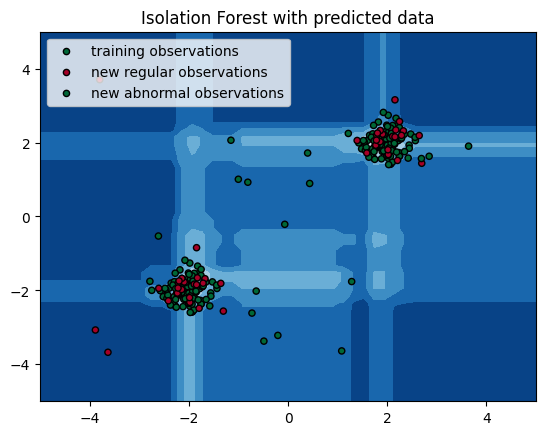

In [141]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = best_model.decision_function(np.c_[xx.ravel(), yy.ravel()])  # isolation forest is used here
Z = Z.reshape(xx.shape)
plt.title("Isolation Forest with predicted data")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred_train, cmap='RdYlGn', s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_test, cmap='RdYlGn', s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c=y_pred_outliers, cmap='RdYlGn', s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c], ["training observations", "new regular observations", "new abnormal observations"], loc="upper left")
plt.show()

In [142]:
y_pred_combined

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1])

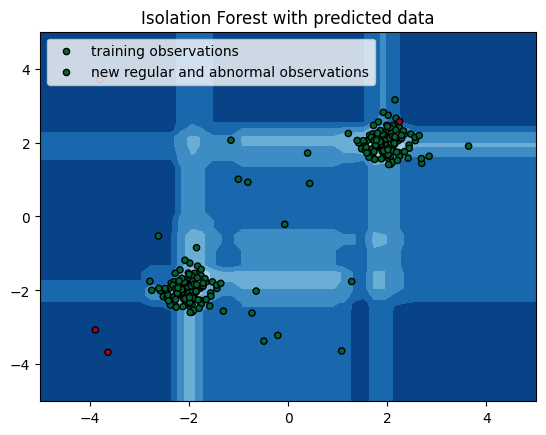

In [143]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = best_model.decision_function(np.c_[xx.ravel(), yy.ravel()])  # isolation forest is used here
Z = Z.reshape(xx.shape)
plt.title("Isolation Forest with predicted data")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred_train, cmap='RdYlGn', s=20, edgecolor='k')
b2 = plt.scatter(np.concatenate([X_test[:, 0], X_outliers[:, 0]]), np.concatenate([X_test[:, 1], X_outliers[:, 1]]), 
                 c=y_pred_combined, cmap='RdYlGn', s=20, edgecolor='k')
#c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c=y_pred_outliers, cmap='RdYlGn', s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
#plt.legend([b1, b2, c], ["training observations", "new regular observations", "new abnormal observations"], loc="upper left")
plt.legend([b1, b2], ["training observations", "new regular and abnormal observations"], loc="upper left")
plt.show()

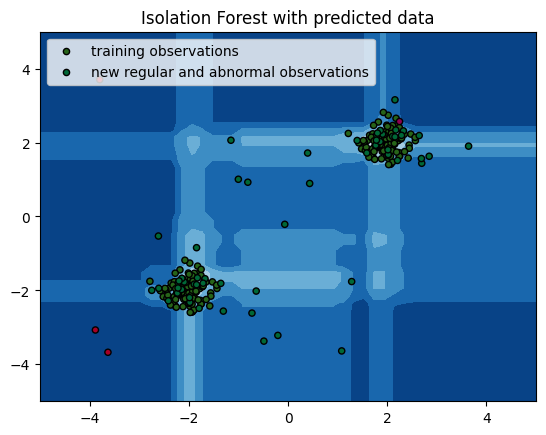

In [144]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = best_model.decision_function(np.c_[xx.ravel(), yy.ravel()])  # isolation forest is used here
Z = Z.reshape(xx.shape)
plt.title("Isolation Forest with predicted data")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred_train, cmap='PiYG', s=20, edgecolor='k')
b2 = plt.scatter(np.concatenate([X_test[:, 0], X_outliers[:, 0]]), np.concatenate([X_test[:, 1], X_outliers[:, 1]]), 
                 c=y_pred_combined, cmap='RdYlGn', s=20, edgecolor='k')
#c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c=y_pred_outliers, cmap='RdYlGn', s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
#plt.legend([b1, b2, c], ["training observations", "new regular observations", "new abnormal observations"], loc="upper left")
plt.legend([b1, b2], ["training observations", "new regular and abnormal observations"], loc="upper left")
plt.show()

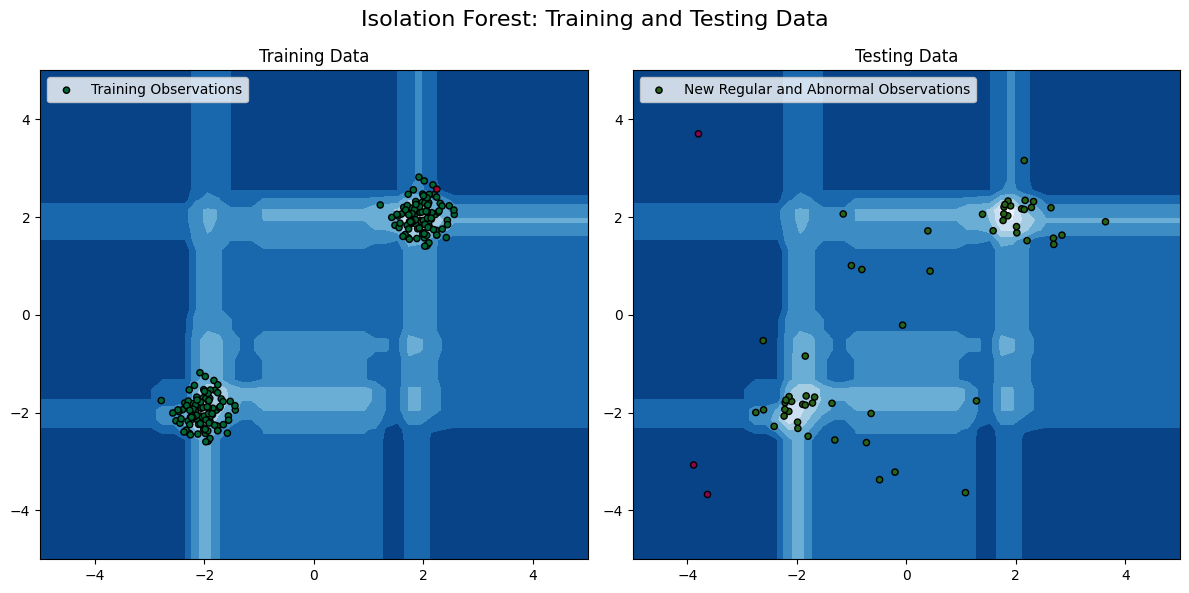

In [145]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train, X_test, X_outliers, y_pred_train, and y_pred_combined are already defined

# Create a meshgrid for the decision boundary
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = best_model.decision_function(np.c_[xx.ravel(), yy.ravel()])  # Isolation Forest decision function
Z = Z.reshape(xx.shape)

# Create subplots: 1 row, 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize as needed

# Plot for Training Data
ax1.set_title("Training Data")
ax1.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
b1 = ax1.scatter(X_train[:, 0], X_train[:, 1], c=y_pred_train, cmap='RdYlGn', s=20, edgecolor='k')
ax1.axis('tight')
ax1.set_xlim((-5, 5))
ax1.set_ylim((-5, 5))
ax1.legend([b1], ["Training Observations"], loc="upper left")

# Plot for Testing Data
ax2.set_title("Testing Data")
ax2.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
b2 = ax2.scatter(
    np.concatenate([X_test[:, 0], X_outliers[:, 0]]),
    np.concatenate([X_test[:, 1], X_outliers[:, 1]]),
    c=y_pred_combined,
    cmap='PiYG',
    s=20,
    edgecolor='k'
)
ax2.axis('tight')
ax2.set_xlim((-5, 5))
ax2.set_ylim((-5, 5))
ax2.legend([b2], ["New Regular and Abnormal Observations"], loc="upper left")

# Add a title for the entire figure
fig.suptitle("Isolation Forest: Training and Testing Data", fontsize=16)

# Display the plots
plt.tight_layout()
plt.show()


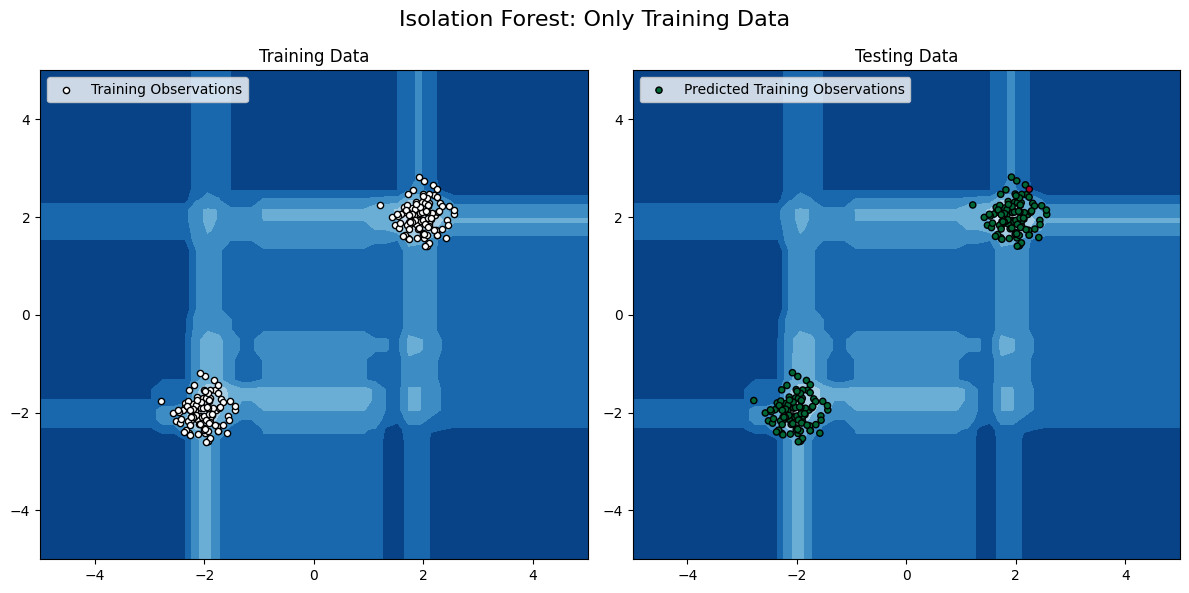

In [146]:
# Create a meshgrid for the decision boundary
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = best_model.decision_function(np.c_[xx.ravel(), yy.ravel()])  # Isolation Forest decision function
Z = Z.reshape(xx.shape)

# Create subplots: 1 row, 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize as needed

# Plot for Training Data
ax1.set_title("Training Data")
ax1.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
b1 = ax1.scatter(X_train[:, 0], X_train[:, 1], c='white', s=20, edgecolor='k')
ax1.axis('tight')
ax1.set_xlim((-5, 5))
ax1.set_ylim((-5, 5))
ax1.legend([b1], ["Training Observations"], loc="upper left")

# Plot for Testing Data
ax2.set_title("Testing Data")
ax2.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
b2 = ax2.scatter(X_train[:, 0], X_train[:, 1], c=y_pred_train, cmap='RdYlGn', s=20, edgecolor='k')
ax2.axis('tight')
ax2.set_xlim((-5, 5))
ax2.set_ylim((-5, 5))
ax2.legend([b2], ["Predicted Training Observations"], loc="upper left")

# Add a title for the entire figure
fig.suptitle("Isolation Forest: Only Training Data", fontsize=16)

# Display the plots
plt.tight_layout()
plt.show()


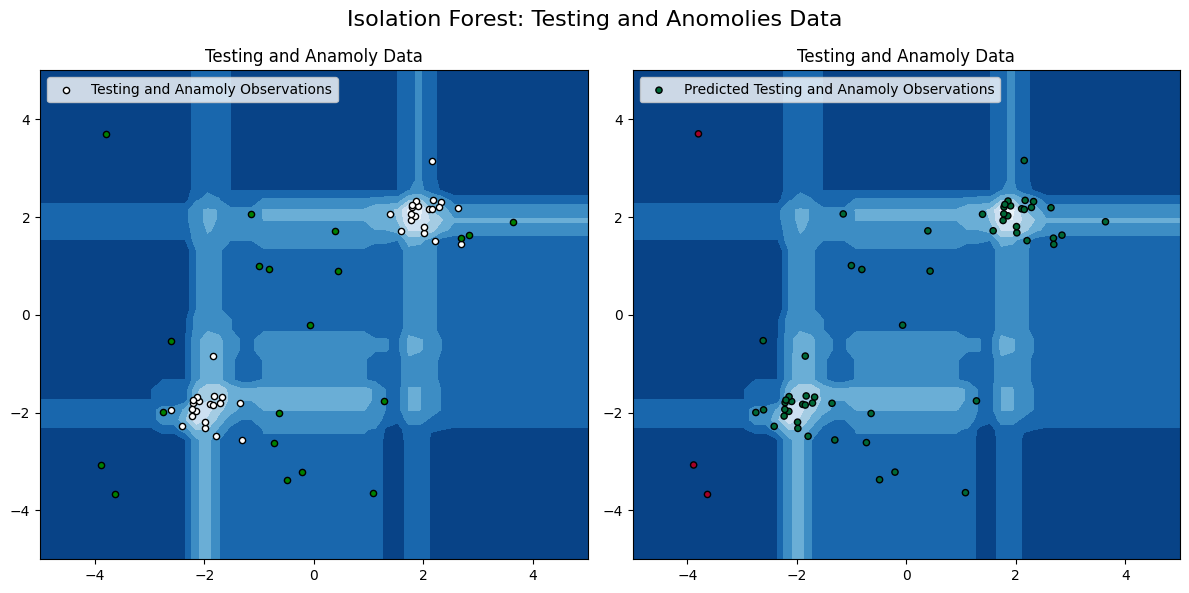

In [147]:
# Create a meshgrid for the decision boundary
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = best_model.decision_function(np.c_[xx.ravel(), yy.ravel()])  # Isolation Forest decision function
Z = Z.reshape(xx.shape)

# Create subplots: 1 row, 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize as needed

# Plot for Training Data
ax1.set_title("Testing and Anamoly Data")
ax1.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
b1 = ax1.scatter(X_test[: , 0], X_test[: , 1], c='white', s=20, edgecolor='k')
c = ax1.scatter(X_outliers[:, 0], X_outliers[:, 1], c='green', s=20, edgecolor='k')
ax1.axis('tight')
ax1.set_xlim((-5, 5))
ax1.set_ylim((-5, 5))
ax1.legend([b1,c], ["Testing and Anamoly Observations"], loc="upper left")

# Plot for Testing Data
ax2.set_title("Testing and Anamoly Data")
ax2.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
b2 = ax2.scatter(
    np.concatenate([X_test[:, 0], X_outliers[:, 0]]),
    np.concatenate([X_test[:, 1], X_outliers[:, 1]]),
    c=y_pred_combined,
    cmap='RdYlGn',
    s=20,
    edgecolor='k'
)
ax2.axis('tight')
ax2.set_xlim((-5, 5))
ax2.set_ylim((-5, 5))
ax2.legend([b2], ["Predicted Testing and Anamoly Observations"], loc="upper left")

# Add a title for the entire figure
fig.suptitle("Isolation Forest: Testing and Anomolies Data", fontsize=16)

# Display the plots
plt.tight_layout()
plt.show()


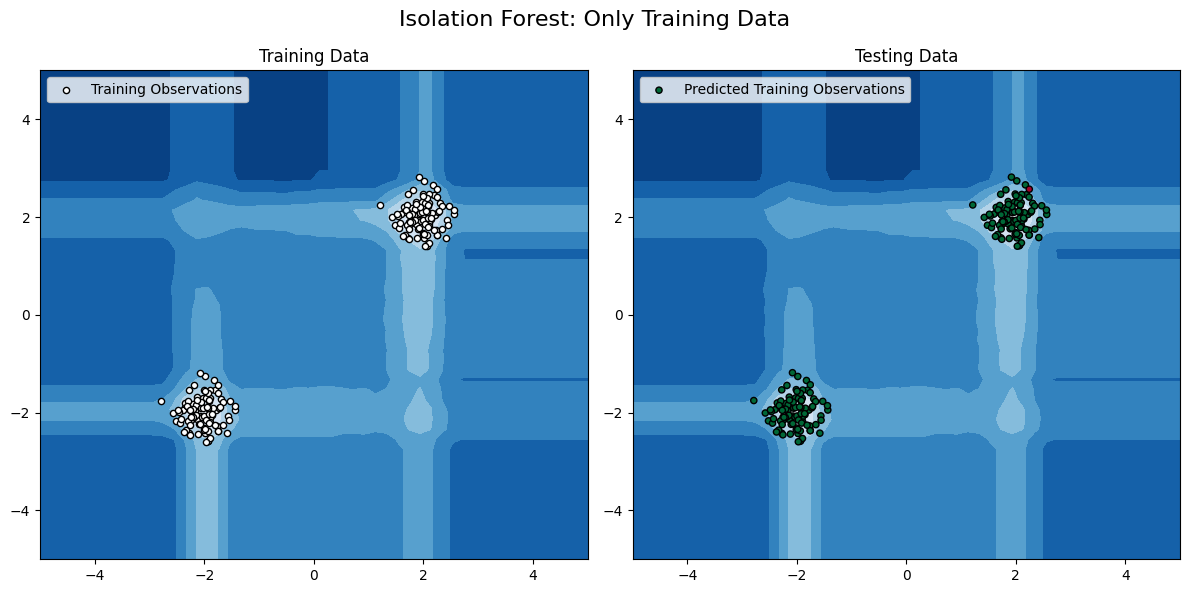

In [148]:
# Create a meshgrid for the decision boundary
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])  # Isolation Forest decision function
Z = Z.reshape(xx.shape)

# Create subplots: 1 row, 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize as needed

# Plot for Training Data
ax1.set_title("Training Data")
ax1.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
b1 = ax1.scatter(X_train[:, 0], X_train[:, 1], c='white', s=20, edgecolor='k')
ax1.axis('tight')
ax1.set_xlim((-5, 5))
ax1.set_ylim((-5, 5))
ax1.legend([b1], ["Training Observations"], loc="upper left")

# Plot for Testing Data
ax2.set_title("Testing Data")
ax2.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
b2 = ax2.scatter(X_train[:, 0], X_train[:, 1], c=y_pred_train, cmap='RdYlGn', s=20, edgecolor='k')
ax2.axis('tight')
ax2.set_xlim((-5, 5))
ax2.set_ylim((-5, 5))
ax2.legend([b2], ["Predicted Training Observations"], loc="upper left")

# Add a title for the entire figure
fig.suptitle("Isolation Forest: Only Training Data", fontsize=16)

# Display the plots
plt.tight_layout()
plt.show()


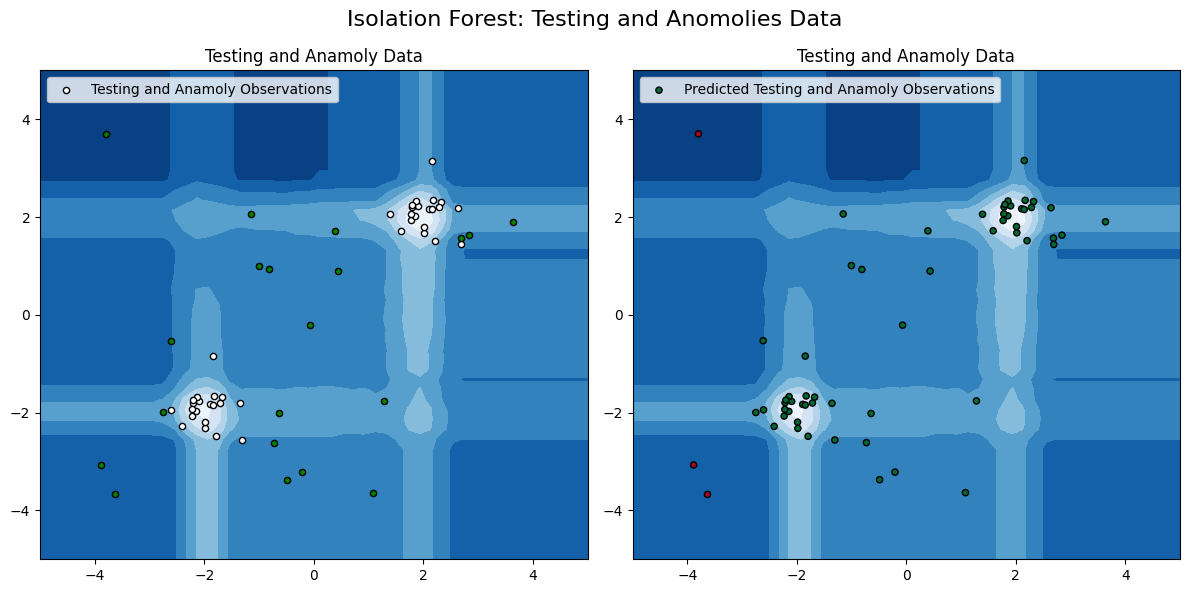

In [149]:
# Create a meshgrid for the decision boundary
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])  # Isolation Forest decision function
Z = Z.reshape(xx.shape)

# Create subplots: 1 row, 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize as needed

# Plot for Training Data
ax1.set_title("Testing and Anamoly Data")
ax1.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
b1 = ax1.scatter(X_test[: , 0], X_test[: , 1], c='white', s=20, edgecolor='k')
c = ax1.scatter(X_outliers[:, 0], X_outliers[:, 1], c='green', s=20, edgecolor='k')
ax1.axis('tight')
ax1.set_xlim((-5, 5))
ax1.set_ylim((-5, 5))
ax1.legend([b1,c], ["Testing and Anamoly Observations"], loc="upper left")

# Plot for Testing Data
ax2.set_title("Testing and Anamoly Data")
ax2.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
b2 = ax2.scatter(
    np.concatenate([X_test[:, 0], X_outliers[:, 0]]),
    np.concatenate([X_test[:, 1], X_outliers[:, 1]]),
    c=y_pred_combined,
    cmap='RdYlGn',
    s=20,
    edgecolor='k'
)
ax2.axis('tight')
ax2.set_xlim((-5, 5))
ax2.set_ylim((-5, 5))
ax2.legend([b2], ["Predicted Testing and Anamoly Observations"], loc="upper left")

# Add a title for the entire figure
fig.suptitle("Isolation Forest: Testing and Anomolies Data", fontsize=16)

# Display the plots
plt.tight_layout()
plt.show()

#Red dots: Represent new abnormal observations (outliers predicted as anomalies).
#Green dots: Represent new regular observations (predicted as normal).